In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [102]:
df=pd.read_csv('walkrun.csv')

In [103]:
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


Dropping date time and username column

In [105]:
df = df.iloc[:,3:]

In [106]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


## Checking Null values

In [107]:
df.isnull().sum()

wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

## Checking Outliers

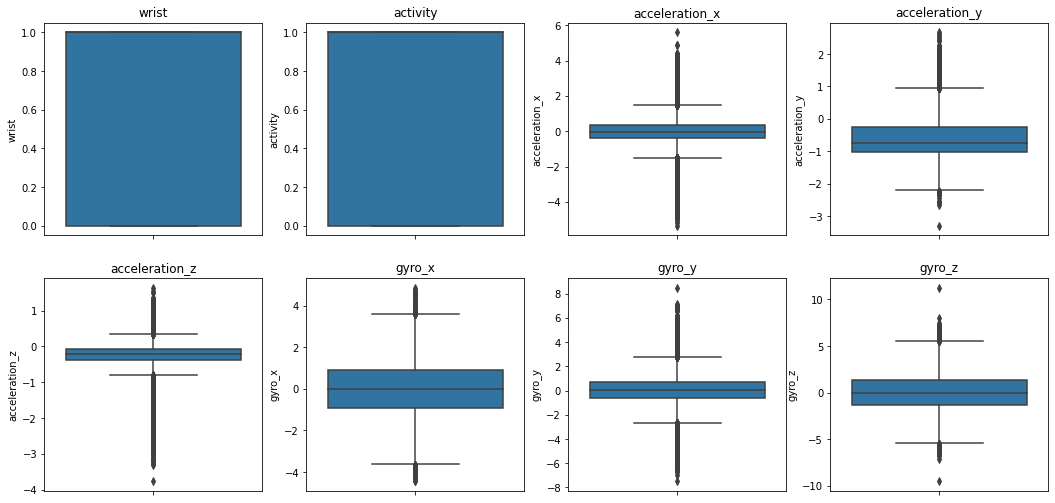

In [108]:
plt.figure(figsize=(18,18))
i=1
for x in df.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y=df[x])
    plt.title(x)
    i+=1

## Visualization

In [109]:
df1=df.copy()

In [110]:
df1.activity=df1.activity.map({0:'Walking',1:'Running'})
df1.wrist=df1.wrist.map({0:'Left',1:'Right'})

<AxesSubplot:xlabel='activity', ylabel='count'>

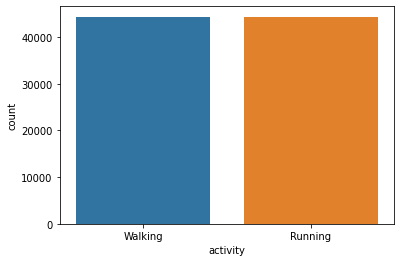

In [111]:
sns.countplot(df1.activity)

In [112]:
df.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [113]:
df.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

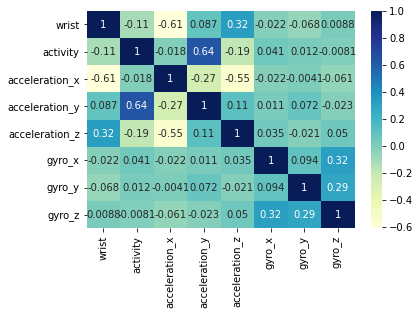

<Figure size 720x720 with 0 Axes>

In [114]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.figure(figsize=(10,10))
plt.show()

In [115]:
df['total_acceleration'] = np.sqrt((df.acceleration_x)**2 + (df.acceleration_y)**2 + (df.acceleration_z)**2)

In [116]:
acdf = df.groupby([df1.activity])['total_acceleration'].agg({'mean','max'})

In [117]:
acdf

,max,mean
activity,,
Running,5.737757,1.451963
Walking,2.182478,1.076322


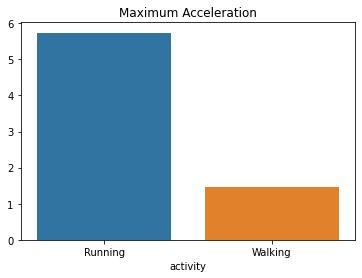

In [118]:
sns.barplot(y=acdf.max(),x=acdf.index)
plt.title('Maximum Acceleration')
plt.show()

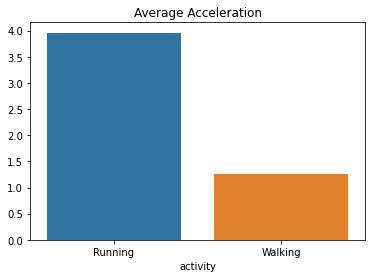

In [119]:
sns.barplot(y=acdf.mean(),x=acdf.index)
plt.title('Average Acceleration')
plt.show()

In [120]:
df

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,total_acceleration
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


## Create X and Y

In [121]:
X=df.drop(df.columns[[1]],axis=1)

In [122]:
X.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,total_acceleration
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889


In [123]:
X.shape

(88588, 8)

In [124]:
Y = df.activity

## Handling Skewness

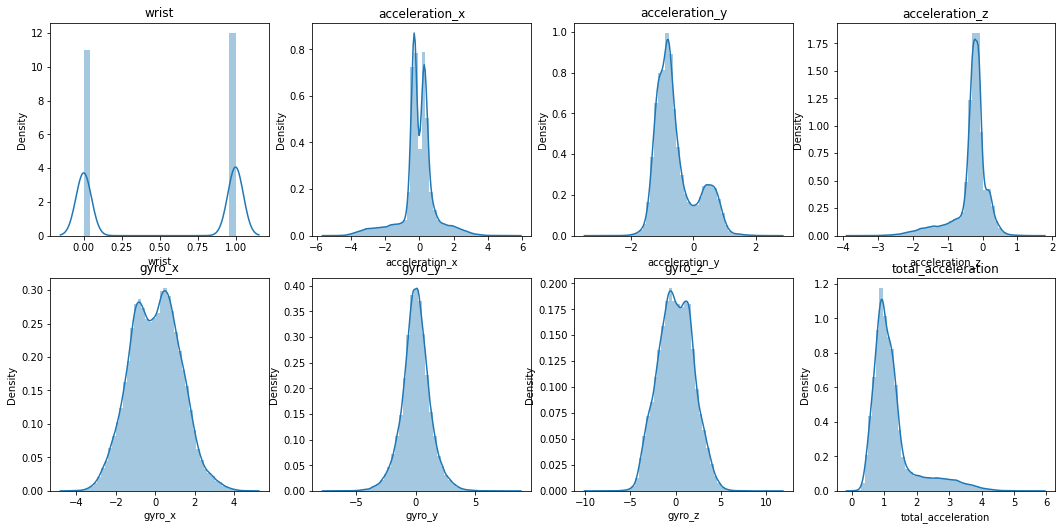

In [125]:
plt.figure(figsize=(18,18))
i=1
for x in X.columns:
    plt.subplot(4,4,i)
    sns.distplot(X[x])
    plt.title(x)
    i+=1

In [126]:
# Taking Cuberoot Transformation
X = np.cbrt(X)

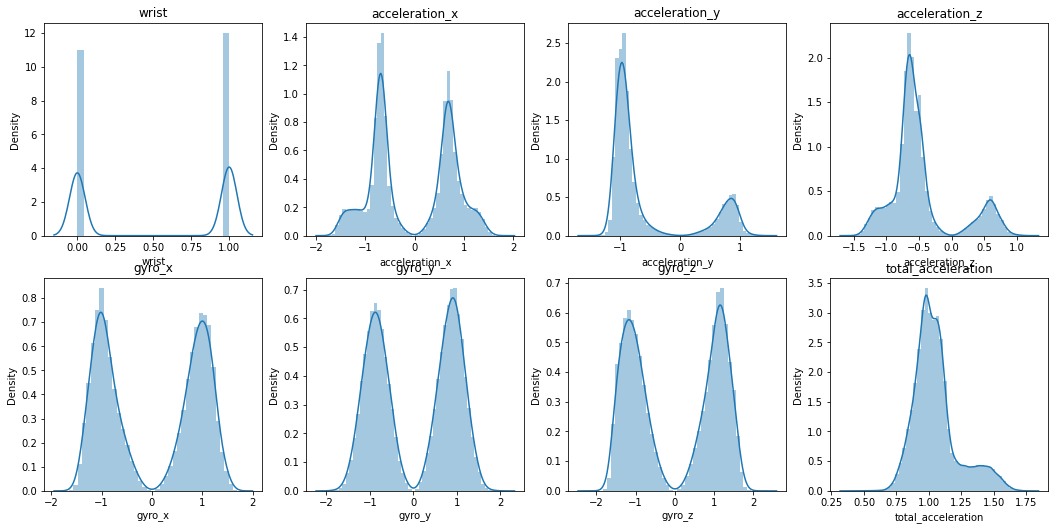

In [127]:
plt.figure(figsize=(18,18))
i=1
for x in X.columns:
    plt.subplot(4,4,i)
    sns.distplot(X[x])
    plt.title(x)
    i+=1

## Scaling

In [128]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)
X

array([[-1.04536822,  0.83135504, -0.49557968, ...,  0.31056628,
        -1.27870498, -0.6550531 ],
       [-1.04536822,  1.11486163, -0.66181083, ...,  0.26293233,
         0.43974795,  0.27558392],
       [-1.04536822,  0.97478213, -0.80288126, ...,  0.47749369,
        -1.20295698,  0.60314055],
       ...,
       [-1.04536822,  0.98774393, -0.68511623, ..., -0.73982453,
        -0.96731478,  0.22037903],
       [-1.04536822,  0.82542864, -0.53661128, ...,  0.79712189,
        -1.08317917, -0.49731618],
       [-1.04536822,  0.87669745, -0.5061896 , ...,  1.07557997,
         0.95850351, -0.56959588]])

## Train Dataset

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=10) 

## Random Forest

In [130]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',criterion='entropy')
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

## Feature Importance 

Feature: 0, Score: 0.01984
Feature: 1, Score: 0.12492
Feature: 2, Score: 0.41040
Feature: 3, Score: 0.21980
Feature: 4, Score: 0.03527
Feature: 5, Score: 0.01464
Feature: 6, Score: 0.06741
Feature: 7, Score: 0.10773


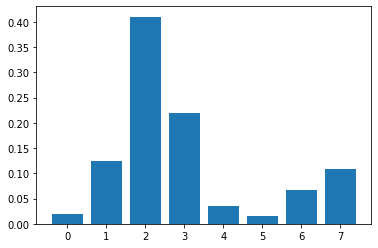

In [133]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [135]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
rfacc = accuracy_score(Y_test,Y_pred)
print(rfacc*100)

[[10938   102]
 [   87 11020]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147

99.14661127918002


# End